<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h2 align="center">Dr. Amiri</h2>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment 2</h4>



<h4 align="left">The blocks that have “Complete this part” written at the beginning of them need to be completed.</h4>
<h4 align="left">Ask your questions from Ehsan Ghasemi(for Q1 and Q2) and Parsa Abedi for (Q3 and Q4)</h4>

## Question 1(30 points)


### Step 1
import our needed libraries.

In [2]:
import numpy as np

### Step 2
In this exercise, we investigate a numerical method for computing the eigenvalues and eigenvectors of a matrix. First, we create a diagonalizable 3x3 matrix in the following section.



In [46]:
## Do not change anything in this section!

W = np.random.randn(3,3)
Q,R = np.linalg.qr(W)

D = np.random.uniform(low = 1, high = 10, size = 3)
D = D * np.random.choice([-1,1],3)

A = Q @ np.diag(D) @ Q.T

print("A = ",A)

A =  [[ 1.13236154 -2.08669767  2.23252203]
 [-2.08669767 -1.18329118 -1.2824422 ]
 [ 2.23252203 -1.2824422  -3.05910518]]


### Step 3
Diagonalize matrix A using the command ‘np.linalg.eig’. At this stage, simply return a diagonal matrix of eigenvalues named D and a matrix V consisting of eigenvectors. Also, reconstruct matrix A using the obtained values and compare it with the previous section.



In [47]:
# Complete this part!

## your code here


D, V = np.linalg.eig(A)
B = V @ np.diag(D) @ np.linalg.inv(V)

print("Eigenvalues = ", D,"\n") 
print("Eigenvectors = \n", V,"\n")
print("B = ", B)

Eigenvalues =  [ 3.38887549 -2.41148437 -4.08742594] 

Eigenvectors = 
 [[-0.80119292  0.50100663 -0.32723426]
 [ 0.4696668   0.86533766  0.1749395 ]
 [-0.37081398  0.01353078  0.92860859]] 

B =  [[ 1.13236154 -2.08669767  2.23252203]
 [-2.08669767 -1.18329118 -1.2824422 ]
 [ 2.23252203 -1.2824422  -3.05910518]]


### Step 4
Note that multiplying matrix A by any non-zero vector yields a non-zero vector.(why?) Create a non-zero arbitrary vector named x and multiply matrix A by it. Also, normalize the answer. Repeat the same process for higher powers of A, such as 2, 10, 15, and 50. You can use the command 'matrix_power' for this part.


In [48]:
# Complete this part!

x = np.array([1,2,3])

x1 = x @ A / np.linalg.norm(x @ A)
x2 = x @ np.linalg.matrix_power(A, 2) / np.linalg.norm(x @ np.linalg.matrix_power(A, 2))
x10 = x @ np.linalg.matrix_power(A, 10) / np.linalg.norm(x @ np.linalg.matrix_power(A, 10))
x15 = x @ np.linalg.matrix_power(A, 15) / np.linalg.norm(x @ np.linalg.matrix_power(A, 15))
x50 = x @ np.linalg.matrix_power(A, 50) / np.linalg.norm(x @ np.linalg.matrix_power(A, 50))

print("x1 = ",x1,"\n")
print("x2 = ",x2,"\n")
print("x10 = ",x10,"\n")
print("x15 = ",x15,"\n")
print("x50 = ",x50,"\n")

x1 =  [ 0.27823892 -0.63162352 -0.72362617] 

x2 =  [0.00461485 0.28767016 0.95771842] 

x10 =  [-0.28210156  0.15329057  0.94705898] 

x15 =  [ 0.34372413 -0.18495207 -0.92067717] 

x50 =  [-0.32721059  0.17492562  0.92861954] 



### Step 5
What pattern do you observe by increasing the power of A? Pay attention to the matrix containing the eigenvectors and compare it with the vectors obtained from this section. Which eigenvalue corresponds to the vector resulting from this process? To ensure the correct interpretation, you can rerun the first section with the new matrix and repeat the same process. Using this result, find the eigenvalue with the largest magnitude of A and its corresponding eigenvector. Based on the presented method, this value is an approximation.

In [49]:
# Complete this part!

## you code here

Lambda, v = np.linalg.eig(A)

idx = np.abs(Lambda).argmax()

Lambda_max = Lambda[idx]
v_max = V[:, idx]

print("Lambda = ", Lambda_max)
print("Eigenvector: \n ", v_max)

Lambda =  -4.087425935733975
Eigenvector: 
  [-0.32723426  0.1749395   0.92860859]


### Step 6
So far, we have been able to obtain the largest eigenvalue (in terms of absolute value) and its corresponding eigenvector. Now, we want to use this method to calculate the other eigenvalues and eigenvectors of the matrix. For this purpose, note that the diagonalizability of a matrix is equivalent to satisfying the following equation.

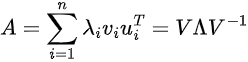

In the above equation, 𝒰ᵢᵀ is the i-th row of the inverse of matrix v. As a result, using the above equation, we can find a matrix whose largest eigenvalue is the second largest eigenvalue of matrix A. In fact, it is sufficient to subtract a rank-one matrix from A. Therefore, by continuing this process, we can obtain the eigenvalues and eigenvectors of A. Based on the points mentioned in the previous section, write a function below that takes a square matrix A and returns a diagonal matrix D and a matrix V of corresponding eigenvectors of D.




In [58]:
# Complete this part!

def eigen(A):
  # input: square matrix A
  # output: diagonal matrix D & eigenvector matrix V
  # NOTE: the equation "A = V @ D @ np.linalg.inv(V)" must hold 

  # your code here
    A_prime = A.copy()
    x = np.array([1,2,3])
    D, V = [], []

    for i in range(A_prime.shape[1]):
      x100 = x @ np.linalg.matrix_power(A_prime, 100) / np.linalg.norm(x @ np.linalg.matrix_power(A_prime, 100))
      eigenvalue = (A_prime @ x100)[0] / x100[0]

      V.append(x50)
      D.append(eigenvalue)
      A_prime -= eigenvalue * (x100 @ x100.T)

    return D, V

D, V = eigen(A)

print("Eigenvalues:n", D)
print("Eigenvectors:n", V)

print("\n", A - V @ np.diag(D) @ np.linalg.inv(V) < 10e-6)

UFuncTypeError: ignored

## Question 2 (30 points)


As you learned in the course, the least squares method is a way of estimating a function given sample points $$(x_i, y_i), \quad  0 \leq i \leq n$$ with the assumption of linearity of the underlying function.

### step 1
Create n=10 sample points $(x_i, y_i)$ where $$y_i = 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ is an error term (measurement error etc.) added to $y_i$ and is modeled by random variables: $\epsilon_i \stackrel{iid}{\sim} \mathcal{N}(0, 1) $  . The x's should range from 0 to 5 and be evenly spaced (hint: use numpy's linspace function)

In [59]:
n = 10
x = np.linspace(0, 5, n)
eps = np.random.normal(size=n)
y = 2*x + 3 + eps

print("Sample points: ")
for i in range(n):
    print(f"({x[i]:.2f}, {y[i]:.2f})")

Sample points: 
(0.00, 2.74)
(0.56, 3.44)
(1.11, 4.38)
(1.67, 5.62)
(2.22, 7.04)
(2.78, 9.30)
(3.33, 8.85)
(3.89, 11.39)
(4.44, 12.14)
(5.00, 12.10)


### step 2
Given the samples of the previous part, try to estimate a linear function that models the relationship between $x_i$'s and $y_i$'s using the least squares method (find a and b such that the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ is minimized)

In [61]:
A = np.column_stack([x, np.ones_like(x)])
b = y.reshape(-1,1)
params = np.linalg.inv(A.T @ A) @ A.T @ b

a, b = params[0][0], params[1][0]
print(f"Linear function: y = {a:.2f}x + {b:.2f}")

Linear function: y = 2.10x + 2.46


### step 3
Plot the sample points and the line you estimated in the previous part in the same graph using matplotlib.

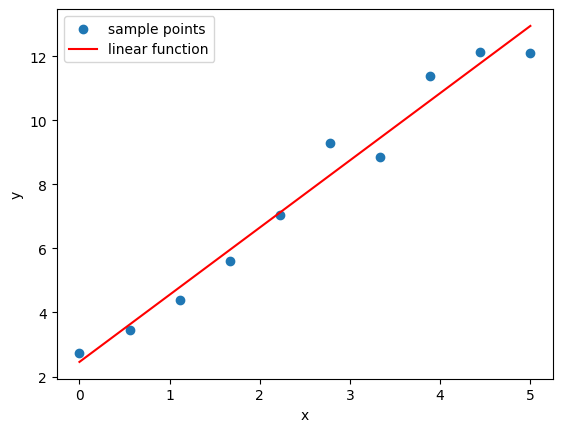

In [63]:
import matplotlib.pyplot as plt

plt.scatter(x, y, label='sample points')
plt.plot(x, a*x + b, 'r', label='linear function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### step 4
Plot the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ as a function of n where $10\leq n \leq 50$ and a and b are the least squares estimates of the line $ax + b = y$.

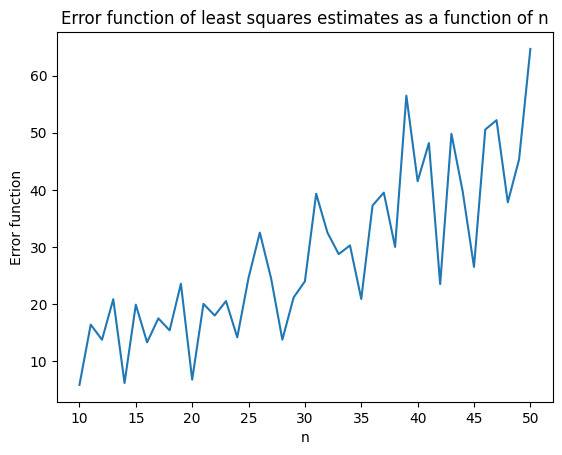

In [75]:
n_range = range(10, 51)

error = np.zeros(len(n_range))

for i, n in enumerate(n_range):
    x = np.linspace(0, 5, n)
    eps = np.random.normal(size=n)
    y = 2*x + 3 + eps

    A = np.column_stack([x, np.ones_like(x)])
    b = y.reshape(-1,1)
    params = np.linalg.inv(A.T @ A) @ A.T @ b

    a, b = params[0][0], params[1][0]

    error_func = np.sum((a * x + b - y)**2)

    error[i] = error_func

# Plot the error function as a function of n
plt.plot(n_range, error)
plt.xlabel('n')
plt.ylabel('Error function')
plt.title('Error function of least squares estimates as a function of n')
plt.show()

### step 5
Repeat part 1 but this time create n=20 sample points with a quadratic term added to y: $$y_i = x^2_i + 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ has the same distribution as before and x's range from 0 to 5 likewise.

In [91]:
n = 20
x = np.linspace(0, 5, n)
eps = np.random.normal(size=n)
y = x**2 + 2*x + 3 + eps

print("Sample points: ")
for i in range(n):
    print(f"({x[i]:.2f}, {y[i]:.2f})")

Sample points: 
(0.00, 3.25)
(0.26, 3.60)
(0.53, 6.05)
(0.79, 4.39)
(1.05, 7.26)
(1.32, 7.27)
(1.58, 9.74)
(1.84, 9.75)
(2.11, 12.90)
(2.37, 13.13)
(2.63, 16.02)
(2.89, 18.95)
(3.16, 20.29)
(3.42, 23.59)
(3.68, 22.91)
(3.95, 25.51)
(4.21, 28.00)
(4.47, 32.55)
(4.74, 36.00)
(5.00, 37.21)


### step 6
Try to use the least squares method to estimate the coefficients of the quadratic function given the sample points of part 5 (hint: in the least squares method we minimze the norm of the error vector $||Ax-y||^2$. Add a column to matrix A for the quadratic terms and then try to minimize the error function using the least squares method).

In [92]:
A = np.column_stack([x, np.ones_like(x)])
A = np.column_stack([A, x**2])
b = y.reshape(-1,1)
params = np.linalg.inv(A.T @ A) @ A.T @ b

a, b, c = params[2][0], params[0][0], params[1][0]
print(f"Quadratic function: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")

Quadratic function: y = 0.89x^2 + 2.46x + 3.19


### step 7
Repeat part 3 for the estimated quadratic function of the previous part.

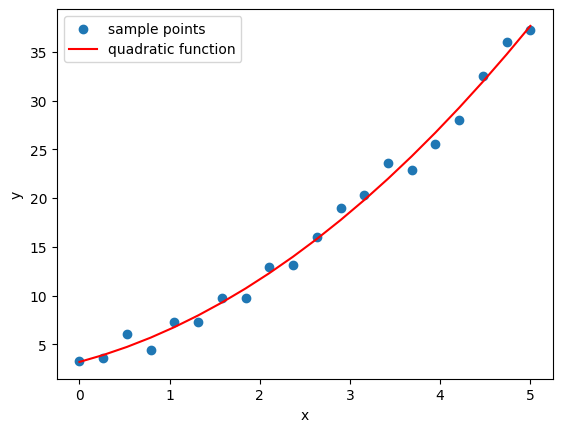

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Complete this part!
plt.scatter(x, y, label='sample points')
plt.plot(x, a*(x**2) + b*(x) + c, 'r', label='quadratic function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
# ------------------

# Question 3 (35 points)

You have been given a dataset containing information about the selling prices and sizes of different houses in a certain area. You have been asked to build a linear regression model using least squares to predict the selling price of a house based on its size.

Tasks:

    Complete the following functions to build a linear regression model using least squares and evaluate its performance on the testing set:

        scatter_plot: Create a scatter plot of the training data with size on the x-axis and selling price on the y-axis.

        compute_slope_intercept: Compute the slope and intercept of the line that best fits the training data using least squares.

        evaluate_performance: Evaluate the performance of the model on the testing set using the mean squared error (MSE) and the coefficient of determination (R^2).

You can use the numpy library to perform the necessary computations.
Pay attention that ypu should only complete the mentioned functions.

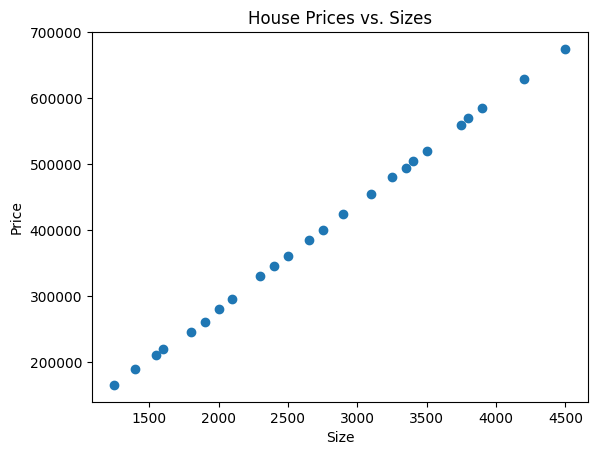

mse : 1386819.57167649 r squared: 0.9998812710949337


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('house_dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Size'], df['Price'], test_size=0.2, random_state=42)

def scatter_plot():
    # Create a scatter plot of the training data


def compute_slope_intercept():
    # Compute the slope and intercept of the line that best fits the training data using least squares

    return slope, intercept

def evaluate_performance(slope, intercept):
    # Evaluate the performance of the model on the testing set

    return mse, r_squared
scatter_plot()
slope , intercept =compute_slope_intercept()
mse , r_squared =evaluate_performance(slope , intercept)
print("mse :" , mse , "r squared:" , r_squared)

 # Question 4 (Bonus part)

You will be given a code that uses the iris dataset and classifies it by Bayesian classifier (you will study classification in a machine learning course).

Tasks:

    You should only complete parts of the code that are asked to be completed.
    Explain what the classifier function does. To do so, you should have a basic knowledge of Bayesian classification.
    Investigate what is the iris dataset and what is the history behind it.

Bayesian classification is a probabilistic classification method that uses Bayes' theorem to calculate the probability of a certain event occurring. In the context of machine learning, it is a common method for classifying data into different categories based on their probability of belonging to a certain class. The classifier function in this code takes a set of features and uses them to classify the input data into different categories based on their probability of belonging to each class
 

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import numpy as np

Complete this part:

In [ ]:
# Load the iris dataset

# Create a pandas DataFrame from the iris data

# Add a column for the target variable

# Print the first rows of the DataFrame


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# first we devide out datas into training and test ones:
n = 120
x_train = iris.data[:n,:]
x_test = iris.data[n:,:]
y_train = iris.target[:n]
y_test = iris.target[n:]

Complete this part:

In [ ]:
# calculation of accuracy:
def accuracy(predicted_outcome):
    
    return Err

In [ ]:
# we define a prediction func and then we complete each part:
def predict(Samples):
    predictions = np.zeros(len(Samples))
    for j in range(len(Samples)):
        sample = Samples[j,:]
        probs = np.zeros(3)
        for i in range(3):
            probs[i] = cal_prob(i,sample) * prior_prob[i]
        predictions[j] = np.argmax(probs)
    return predictions

# now we have to define prior probabilities:
prior_prob = np.zeros(3)
for i in range(len(y_test)):
    if y_test[i] == 0:
        prior_prob[0]+=1
    elif y_test[i] == 1:
        prior_prob[1]+=1
    elif y_test[i] == 2:
        prior_prob[2]+=1
for i in range(3):
    prior_prob[i] /= len(y_test)

# calculation of variance and mean of each class:
variances = np.zeros((3,4))
means = np.zeros((3,4))
for i in range(3):
    x_i = x_train[y_train == i ,:]
    means[i,:] = x_i.mean(axis =0)
    variances[i,:] = x_i.var(axis =0)

# calculation of probability:
def cal_prob(i , sample):
    prob = 1;
    for c in range(4):
        exp = -((sample[c] - means[i,c])**2) / (2*variances[i,c])
        prob *= np.exp(exp)*(1/np.sqrt(2*np.pi*variances[i,c]))
    return prob
# Baysian classifier:
def bay_classifier():
    predicted_outcome = predict(x_test)
    return predicted_outcome

In [ ]:
predicted_outcome = bay_classifier()
acc = accuracy(predicted_outcome)
print("Baysian classifier accuracy: ",acc)
y_1 = confusion_matrix(y_test,predicted_outcome)
print("confusion matrix:\n",y_1)

Baysian classifier accuracy:  100.0
confusion matrix:
 [[30]]
